# gradient lab

## setup

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## functions

In [47]:
def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

In [48]:
def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=float)
    for i, (start, stop, is_horizontal) in enumerate(
        zip(start_list, stop_list, is_horizontal_list)
    ):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)
    return np.uint8(result)

## config

In [80]:
WIDTH = 512
HEIGHT = 512

R = (0, 255)
G = (0, 255)
B = (192, 64)

H = (True, False, True)

# main

In [73]:
width, height = 512, 512
x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, height)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
R = R / R.max() * 255

# plt.imshow(R.astype(np.uint8), cmap="grey")
# plt.show()

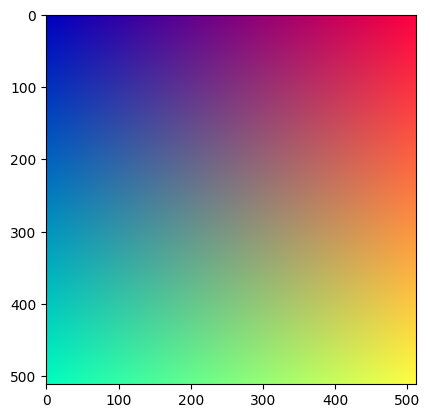

In [81]:
starts, stops = [tuple(r) for r in np.array([R, G, B]).T]

gradient = get_gradient_3d(WIDTH, HEIGHT, starts, stops, H)

# # image output
# Image.fromarray(gradient).save("gradient.jpg", quality=95)

# # plot output
plt.imshow(gradient)
plt.show()

## setup

In [55]:
from rich.console import Console

C = Console()

from colour import Color

## functions

In [56]:
def print_hex(hex_code):
    C.print(hex_code.upper(), style=f"bold {hex_code}")

## main

In [57]:
print_hex("#b2a2c1")

#B2A2C1

In [63]:
print_hex(Color(rgb=[x / 255 for x in starts]).hex_l)
print_hex(Color(rgb=[x / 255 for x in stops]).hex_l)

#0000C0

#FFFF40